# Time Value of Money 

Project valuation has long been a challenging issue as there are various uncertainties in the process. Decreasing uncertainty, on the other hand, ensures predictability, which in turn increases the likelihood of the profitability of an investment. As projects cannot be accomplished within a short period, time turns out to be an important component in that value of investment changes in time. In other words, $\$5.000$ today is not the same $\$5.000$ two years from now.

Thus, to take into account a new concept is emerged, which is known as `the value of money` meaning that today's money worth more than the money in the future due to earning potential between today and the future. Within this context, considering time value of money enables investors to assess the project valuation in a more solid way. 

In this course, we will learn the main concepts of project valuation. These concepts include:
    * Time Value of Money
    * Net Present Value
    * Internal Rate of Return

## 8.1. Net Present Value

`Net present value`, NPV for short, is such a metric for project valuation. NPV is a tool dealing with comparison of project cost and cash inflows. It is rather intuitive in that all costs incurred and all cash inflows generated over time are discounted back to present day so that an investor can easily decide if the project is feasible.

Discounting back the future cash flow can be done via discount rate, which is a compensation for the risk assumed throughout the investment period. Technically, `discount rate` refers to the interest rate that bridge between the present and future value of money.

In practice, before commencing the project the calculation of NPV is one of the first thing that financial analyst conduct. A quick example can illustrate the concept better:

Assume that an initial investment requires $\$2.000$ and the project will have an annual cash inflow of $\$1.000$ over three years from now. In order to compare the $\$2000$ with $\$3000$ in total, the analyst needs to consider the time value of money, which is discount rate.

Net present value can be formulated as follows:

$$NPV(t)=\sum_{t=0}^T \frac{CF(t)}{(1+r)^t}$$

where CF denotes cash flow and r indicates discount rate.

Let's practice in Python. Suppose that initial investment is $\$1000$ at time t and cash flows generated as of t+1 are $\$400$, $\$450$, $\$350$, $\$475$, $\$500$

In [1]:
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
cash_flow=[-1000,400,450,350,475,500]
discount_rate=0.1
time_horizon=5

In [3]:
def NPV(cash_flow,discount_rate,time_horizon):
    cash_gen=[]
    for i in range(time_horizon+1):
        cash_gen.append(cash_flow[i]/(1+discount_rate)**i)
        npv=np.sum(cash_gen)
    return npv,cash_gen

In [4]:
npv,cash_gen=NPV(cash_flow,discount_rate,time_horizon)
print("Net present value of the investment:{:.2f}".format(npv))

Net present value of the investment:633.39


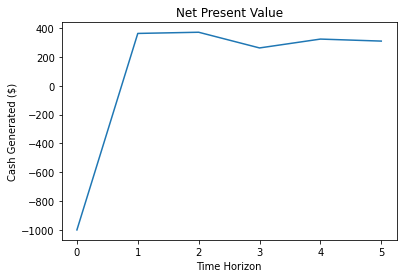

In [5]:
import matplotlib.pyplot as plt
plt.plot(cash_gen)
plt.title('Net Present Value')
plt.xlabel('Time Horizon')
plt.ylabel('Cash Generated ($)')
plt.show()

NPV figure suggests that NPV starts to increase after the project begins. Then NPV follows a rather stable path. However, as the initial investment requires $\$1000$ initially, cash inflow generated within 5 year does make the investment profitable. Shortly, NPV becomes positive with the value of $633.

There is a much shorter way to conduct NPV analysis in Python. Pyhon has built-in function named `.npv()`, which requires 2 parameters, namel `discount rate` and `cash flow` and it does the same thing with our NPV function above.

In [10]:
import numpy_financial as npf

npv= npf.npv(discount_rate, cash_flow);  

print("Net present value of the investment:{:.2f}".format(npv))

Net present value of the investment:633.39


Let's play with the figures we previously assume:

In [11]:
cash_flow=[-1500,300,300,250,400,200,450,400,400,350,300]
discount_rate=0.2
time_horizon=10

In [12]:
npv,cash_gen=NPV(cash_flow,discount_rate,time_horizon)
print("Net present value of the investment:{:.2f}".format(npv));

Net present value of the investment:-152.07


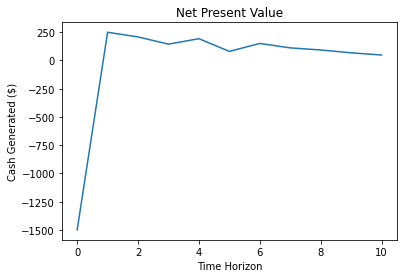

In [13]:
plt.plot(cash_gen)
plt.title('Net Present Value')
plt.xlabel('Time Horizon')
plt.ylabel('Cash Generated ($)')
plt.show()

In this example, the inital investment is higher than that of previous example. As the cash flow given in the example vary considerably, it affects the NPV and of course cash generated along the way. Thus, the NPV of $-152 implies that this project is not feasible.

##  Internal Rate of Return

It is a ratio used in the evaluation of investment projects. The `internal rate of return` is defined as the discount rate that equals the net present value of an investment project to zero, in other words, IRR is the discount rate resulting in a zero NPV. The internal rate of return also indicates the extent to which investment creates value added. So, internal rate of return, abbreviated as IRR, is a closely related concept with NPV.

For example, let us initiate a one-year project with an initial cost of $\$100.000$. The expected cash return of this project is $\$120.000$. For this project, the value that equals the NPV value to zero, that is, the internal rate of return is 20%.

In deciding an investment, the internal rate of return is compared with the rate of return expected by the investor. The minimum profitability rate expected from the investment is considered as the `capital cost`. As a result of the comparison, the project is either accepted or rejected. We can summarize it by:

$$
\begin{cases}
\text{If} \text{ IRR}> \text{Cost of Capital},&\text{accept }\\
\text{If} \text{ IRR}< \text{Cost of Capital},&\text{reject}\\
\end{cases}$$

Mathematically speaking, the IRR can be computed as follows:

$$NPV(t)=\sum_{t=0}^T \frac{CF(t)}{(1+IRR)^t}=0$$

Practicing helps us understand the concept better. To be consistent, we will use the same inputs that we have in NPV example. The only parameter we need to change is the discount rate as IRR will be used in lieu of it:

In [14]:
cash_flow=[-1000,200,250,350,375,400]
IRR=0.2
time_horizon=np.arange(6)

In [15]:
import numpy as np
def NPV_IRR(IRR, cash_flow, time_horizon):  
    return np.sum(cash_flow / (1. + IRR) ** time_horizon)

Finding IRR is not different from finding the root of NPV function that we define above. To find a root of a function `fsolve` is used in Python as in many other programming languages:

In [16]:
from scipy.optimize import fsolve
def irr(cash_flow, time_horizon, IRR):
    return fsolve(NPV_IRR, IRR, args=(cash_flow, time_horizon))

In [17]:
print('IRR is: {:.4f}'.format(irr(cash_flow, time_horizon, IRR)[0]))

IRR is: 0.1524


Similarly, numpy provides us a built-ing function for finding IRR, which makes our life much more easier as it is a single line of code and it confirms our result:

In [19]:
print('IRR is again: {:.4f}'.format(npf.irr(cash_flow)))

IRR is again: 0.1524


# Conclusion

`Net Present Value` and `Internal Rate of Return` are two important concept in evaluating the feasibility of a project. As we see, these concepts totaly makes sense and easy-to-implement in Python.